<HTML>
    <HEADER>
        <BODY> 
            <FONT SIZE="6" COLOR="#90AACC"><p><B>House Prices: Regression Techniques <B></p></FONT><BR>
            <FONT SIZE="4" COLOR="#000000"><p><B>Por: Sebastián Uribe Ocampo</B></p></FONT>
            </BODY>
    </HEADER>
</HTML>
        
- **email:** sebasuribe07@bancolombia.com.co

# House Price


Este DateSet contiene precios de venta de casas para el condado de King, que incluye Seattle. Incluye viviendas vendidas entre mayo de 2014 y mayo de 2015.

<table align="center"><tr><td align="center" width="9999">
    <p align="center">
        <img src="img/for_sale.JPG" alt="terminal" width="400" align="center"/>
    </p>
</td></tr></table>

## Etapas de Trabajo

El reto, busca el análisis de qué caracteristicas brindan información del precio de una casa. En particular, este taller busca mostrar a Python como una de las herramientas de aprendizaje automático más utilizadas en donde se busca que creen un modelo capaz de estimar el $ valor de una casa.

1. Pregunta o definición del problema.
2. (Carga de datos). Adquirir datos de entrenamiento y pruebas.
3. Analizar, identificar patrones, y explorar los datos.
4. Imputación, preparación y limpieza los datos.
5. Modelar, predecir y resolver el problema.
6. Visualizar, informar y presentar los pasos de resolución de problemas y la solución final.
7. Producción


El flujo de trabajo indica una secuencia general de cómo cada etapa puede seguir a la otra. Sin embargo hay casos de uso con excepciones.

Donde es normal combinar múltiples etapas de flujo de trabajo. **Por ejemplo** : Imputar y visualizar nuevamente los datos. 

- Dentro de las librerias más comunes que se utilizan en Analitica se encuentra una llamada **Pandas**, la cual es una libreria de código abierto con licencia BSD que proporciona, alto rendimiento, facil manejo de estructuras y herramientas de análisis de datos para Python.

Verificar Instalación:

La mejor manera de instalar pandas es a través de Conda.

* Conda install pandas

Los paquetes están disponibles para todas las versiones de python compatibles en Windows, Linux y MacOS.

Las ruedas también se cargan en PyPI y se pueden instalar con

* pip install pandas


# Librerias

Para utilizar alguna libreria en Python se utiliza el comando  *****Import*****, esta función carga en memoria todas las funciones y metodos de la Libreria. 

In [2]:
# Importamos las librerias necesarias 

# Manejo de datos
import pandas as pd # renombramos la variable pandas como pd por comodidad
import numpy as np
from scipy import stats

# Librerias para graficar
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# DataSet

In [4]:
# Aqui es donde se carga los datos para poder analizarlos. 
houses = pd.read_csv('data/kc_house_data.csv')

¿Qué variables están disponibles en el set de datos?

In [213]:
# Miremos que columnas que tiene el dataset
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [214]:
# Cantidad de filas | columnas -> dimensionalidad , forma
houses.shape

(21613, 21)

In [215]:
# tipos de datos
houses.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Diccionario de datos

|    Variable   	|                                                  Definition                                                  	|
|:-------------:	|:------------------------------------------------------------------------------------------------------------:	|
|       id      	|                                            a notation for a house                                            	|
|      date     	|                                              Date house was sold                                             	|
|     price     	|                                          Price is prediction target                                          	|
|    bedrooms   	|                                           Number of Bedrooms/House                                           	|
|   bathrooms   	|                                           Number of bathrooms/House                                          	|
|  sqft_living  	|                                          square footage of the home                                          	|
|    sqft_lot   	|                                           square footage of the lot                                          	|
|     floors    	|                                        Total floors (levels) in house                                        	|
|   waterfront  	|                                    House which has a view to a waterfront                                    	|
|      view     	|                                                Has been viewed                                               	|
|   condition   	|                                     How good the condition is ( Overall )                                    	|
|     grade     	|                 overall grade given to the housing unit,  based on King County grading system                	|
|   sqft_above  	|                                  square footage of house apart from basement                                 	|
| sqft_basement 	|                                        square footage of the basement                                        	|
|    yr_built   	|                                                  Built Year                                                  	|
|  yr_renovated 	|                                         Year when house was renovated                                        	|
|    zipcode    	|                                                      zip                                                     	|
|      lat      	|                                              Latitude coordinate                                             	|
|      long     	|                                             Longitude coordinate                                             	|
| sqft_living15 	| Living room area in 2015(implies-- some renovations)  This might or might not have affected the lotsize area 	|
|   sqft_lot15  	|                               lotSize area in 2015(implies-- some renovations)                               	|

In [216]:
# Informacion adicional
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [217]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [218]:
houses.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [219]:
# Cantidad de datos faltantes
houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [220]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [221]:
houses.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [222]:
print(f'Numero de filas duplicadas : {houses.shape[0]-houses.drop_duplicates().shape[0]}')

Numero de filas duplicadas : 0


# EDA

## Variable Objetivo

In [223]:
houses.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Python cuenta con Librerias especializadas que se unen a Pandas para facilitar y generar graficos más complejos. 

* Matplotlib
* SeaBorn
* Plotly
* Bokeh

En este taller utilizaremos seaborn y matplotlib. 

*pip install seaborn*

*pip install matplotlib*

In [224]:
from scipy.stats import norm

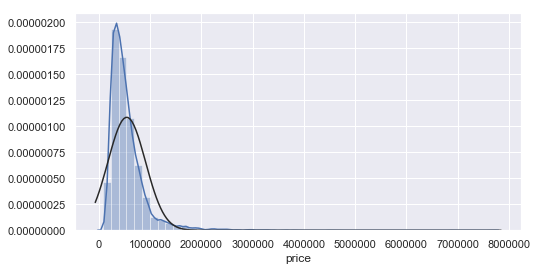

<Figure size 432x288 with 0 Axes>

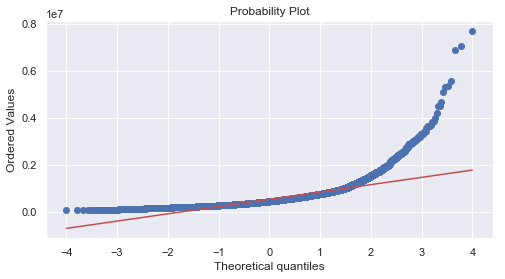

In [225]:
plt.figure(figsize=[8,4]);
sns.distplot(houses.price,fit= norm,kde=True);
fig = plt.figure();
plt.figure(figsize=[8,4]);
res=stats.probplot(houses['price'], plot=plt);

In [226]:
# filtrar las casas con precios mayores a un valor
houses[houses.price>2000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
153,7855801670,20150401T000000,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
246,2025069065,20140929T000000,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
269,7960900060,20150504T000000,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
282,7424700045,20150513T000000,2050000.0,5,3.00,3830,8480,2.0,0,1,...,9,2630,1200,1905,1994,98122,47.6166,-122.287,3050,7556
300,3225069065,20140624T000000,3075000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
312,1860600135,20140502T000000,2384000.0,5,2.50,3650,9050,2.0,0,4,...,10,3370,280,1921,0,98119,47.6345,-122.367,2880,5400
518,4386700135,20141114T000000,2250000.0,4,2.25,4760,8036,2.5,0,0,...,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323
540,622049114,20150218T000000,2125000.0,3,2.50,5403,24069,2.0,1,4,...,12,5403,0,1976,0,98166,47.4169,-122.348,3980,104374
656,3760500116,20141120T000000,3070000.0,3,2.50,3930,55867,1.0,1,4,...,8,2330,1600,1957,0,98034,47.7022,-122.224,2730,26324
779,1954700695,20140612T000000,2250000.0,5,4.25,4860,9453,1.5,0,1,...,10,3100,1760,1905,0,98112,47.6196,-122.286,3150,8557


In [227]:
# filtrar las casas con precios menores a un valor
houses[houses.price<100000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
2141,1623049041,20140508T000000,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
3108,1721801591,20150219T000000,89950.0,1,1.00,570,4080,1.0,0,0,...,5,570,0,1942,0,98146,47.5098,-122.334,890,5100
3321,2724200705,20141212T000000,95000.0,2,1.00,800,8550,1.0,0,0,...,7,800,0,1947,0,98198,47.4075,-122.294,1490,8550
3767,1523049188,20150430T000000,84000.0,2,1.00,700,20130,1.0,0,0,...,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630
3805,7335400215,20150505T000000,95000.0,1,0.75,760,5746,1.0,0,0,...,5,760,0,1915,0,98002,47.3046,-122.215,970,6696
5303,5128000010,20150105T000000,99000.0,2,1.00,960,8236,1.0,0,0,...,6,960,0,1948,0,98058,47.4698,-122.166,1260,8236
5723,1788800630,20141029T000000,96500.0,3,1.00,840,12091,1.0,0,0,...,6,840,0,1959,0,98023,47.3281,-122.343,840,9324
5866,9320900420,20141014T000000,89000.0,3,1.00,900,4750,1.0,0,0,...,6,900,0,1969,0,98023,47.3026,-122.363,900,3404


In [228]:
# Filtrar casas construidas en algun año
houses[houses.yr_built==1991]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
59,8079040320,20150223T000000,430000.0,4,3.00,1850,9976,2.0,0,0,...,8,1850,0,1991,0,98059,47.5059,-122.149,2270,8542
108,1853000400,20150305T000000,680000.0,4,2.50,3140,28037,2.0,0,0,...,10,3140,0,1991,0,98077,47.7304,-122.082,2990,35001
252,1422300030,20150401T000000,415000.0,3,2.25,1510,36224,2.0,0,0,...,8,1510,0,1991,0,98045,47.4616,-121.711,1730,36224
332,8078490390,20140729T000000,295000.0,3,2.00,1810,10530,1.0,0,2,...,8,1810,0,1991,0,98022,47.1913,-122.012,1910,10450
343,7004200060,20141017T000000,309600.0,4,1.75,1275,20000,1.0,0,0,...,6,1275,0,1991,0,98070,47.3796,-122.490,1660,20000
367,1118500030,20141001T000000,810000.0,4,2.50,3520,15420,2.0,0,0,...,10,3520,0,1991,0,98074,47.6375,-122.016,3400,21455
410,6700400140,20150318T000000,268000.0,3,2.50,1550,8134,2.0,0,0,...,7,1550,0,1991,0,98031,47.4040,-122.191,1550,8134
437,11500890,20150312T000000,843000.0,3,2.50,3130,8750,2.0,0,0,...,10,3130,0,1991,0,98052,47.6954,-122.103,2860,9003
546,4139400710,20140523T000000,782000.0,4,2.50,2380,9614,2.0,0,0,...,10,2380,0,1991,0,98006,47.5623,-122.116,2560,9770
655,5196410260,20150422T000000,1000000.0,3,2.50,3180,10492,2.0,0,2,...,10,3180,0,1991,0,98052,47.6550,-122.124,3000,9812


In [229]:
# Filtrar multiples condiciones
houses[(houses.yr_built==1991)&(houses.waterfront>0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
15482,624069108,20140812T000000,3200000.0,4,3.25,7000,28206,1.0,1,4,...,12,3500,3500,1991,0,98075,47.5928,-122.086,4913,14663
17558,7631800015,20150407T000000,2510000.0,3,3.25,5480,57990,2.0,1,4,...,11,5480,0,1991,0,98166,47.4558,-122.371,2500,22954


In [230]:
print('La casa con más habitaciones:                 ',houses['bedrooms'].max())
print('La casa con menos habitaciones:               ',houses['bedrooms'].min())
print('Promedio de habitaciones por casa:            ',houses['bedrooms'].mean())

La casa con más habitaciones:                  33
La casa con menos habitaciones:                0
Promedio de habitaciones por casa:             3.37084162309721


In [231]:
# Seleccionar una fila dependiendo del indice
houses.loc[5]

id                    7237550310
date             20140512T000000
price                  1.225e+06
bedrooms                       4
bathrooms                    4.5
sqft_living                 5420
sqft_lot                  101930
floors                         1
waterfront                     0
view                           0
condition                      3
grade                         11
sqft_above                  3890
sqft_basement               1530
yr_built                    2001
yr_renovated                   0
zipcode                    98053
lat                      47.6561
long                    -122.005
sqft_living15               4760
sqft_lot15                101930
Name: 5, dtype: object

In [232]:
# Seleccionar una fila dependiendo de la posicion
houses.iloc[800]

id                    4083305445
date             20140815T000000
price                     650000
bedrooms                       3
bathrooms                      2
sqft_living                 1340
sqft_lot                    2720
floors                       1.5
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1340
sqft_basement                  0
yr_built                    1913
yr_renovated                   0
zipcode                    98103
lat                      47.6518
long                    -122.335
sqft_living15               2030
sqft_lot15                  4590
Name: 800, dtype: object

Podemos realizar agrupaciones y ver cuantas mujeres sobrevivieron

In [233]:
houses.groupby(['yr_built'])['id'].count().sort_values(ascending=False).nlargest(5)

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
Name: id, dtype: int64

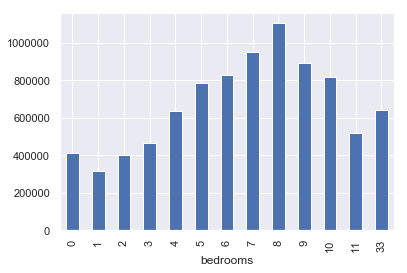

In [234]:
houses[['price','bedrooms']].groupby(['bedrooms'])['price'].mean().plot.bar()

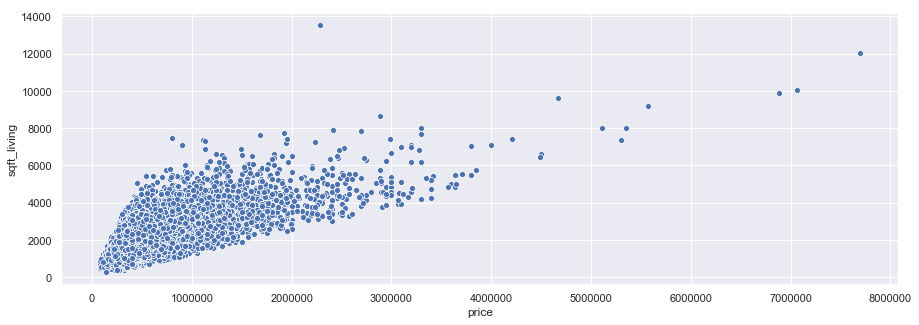

In [235]:
plt.figure(figsize=[15,5])
sns.scatterplot(x='price',y='sqft_living',data=houses)

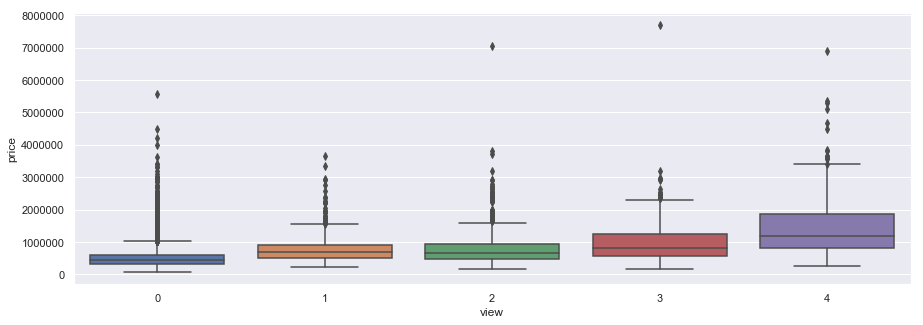

In [236]:
plt.figure(figsize=[15,5])
sns.boxplot(x='view',y='price',data=houses)

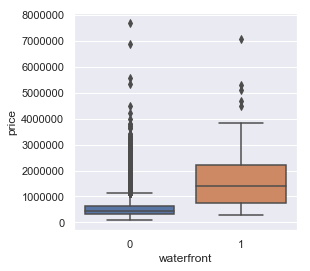

In [237]:
plt.figure(figsize=[4,4])
sns.boxplot(x='waterfront',y='price',data=houses)

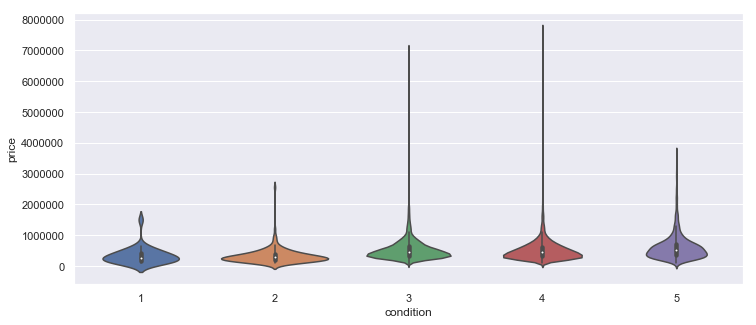

In [238]:
plt.figure(figsize=[12,5])
sns.violinplot(x='condition',y='price',data=houses)

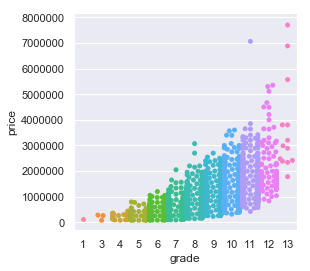

In [239]:
plt.figure(figsize=[4,4])
sns.swarmplot(x='grade',y='price',data=houses)

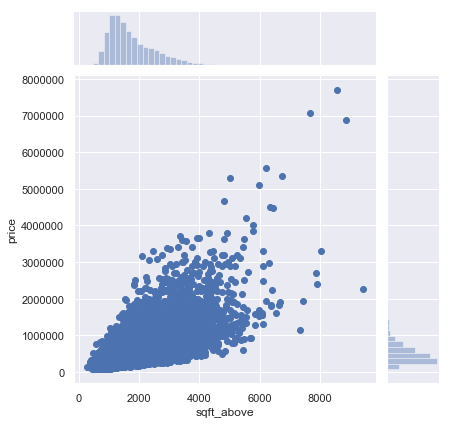

In [240]:
g=sns.jointplot(y="price", x="sqft_above", data=houses)

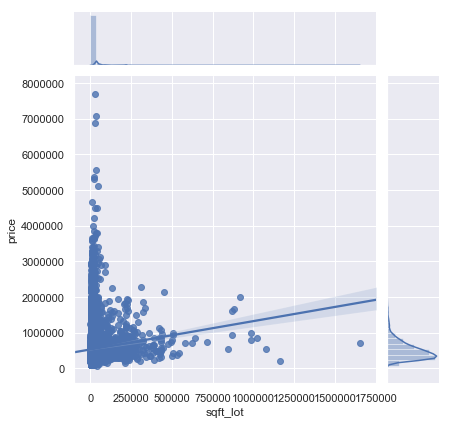

In [241]:
sns.jointplot(y="price",x="sqft_lot", data=houses, kind="reg")

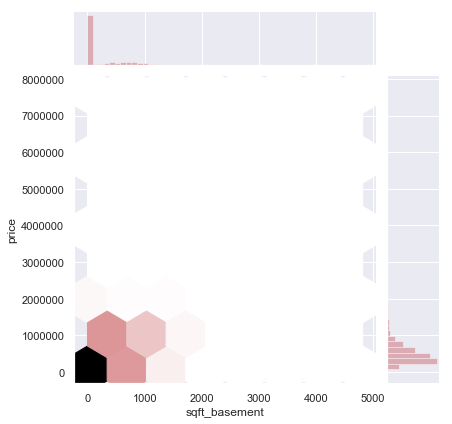

In [242]:
sns.jointplot(y="price", x="sqft_basement", data=houses, kind="hex",color='r',joint_kws=dict(gridsize=7))

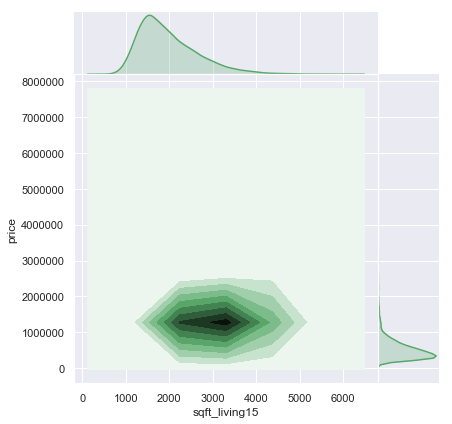

In [243]:
sns.jointplot(y="price", x="sqft_living15", data=houses,kind="kde", space=0, color="g",joint_kws=dict(gridsize=7))

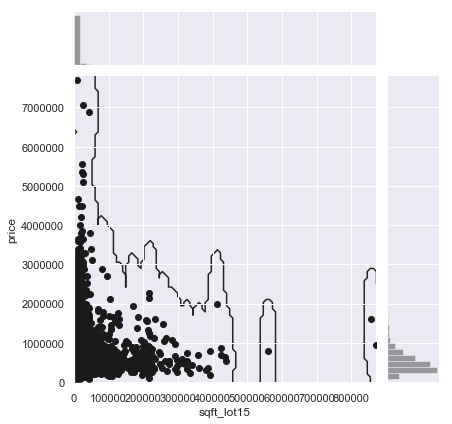

In [244]:
sns.jointplot(y="price", x="sqft_lot15",data=houses, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6)

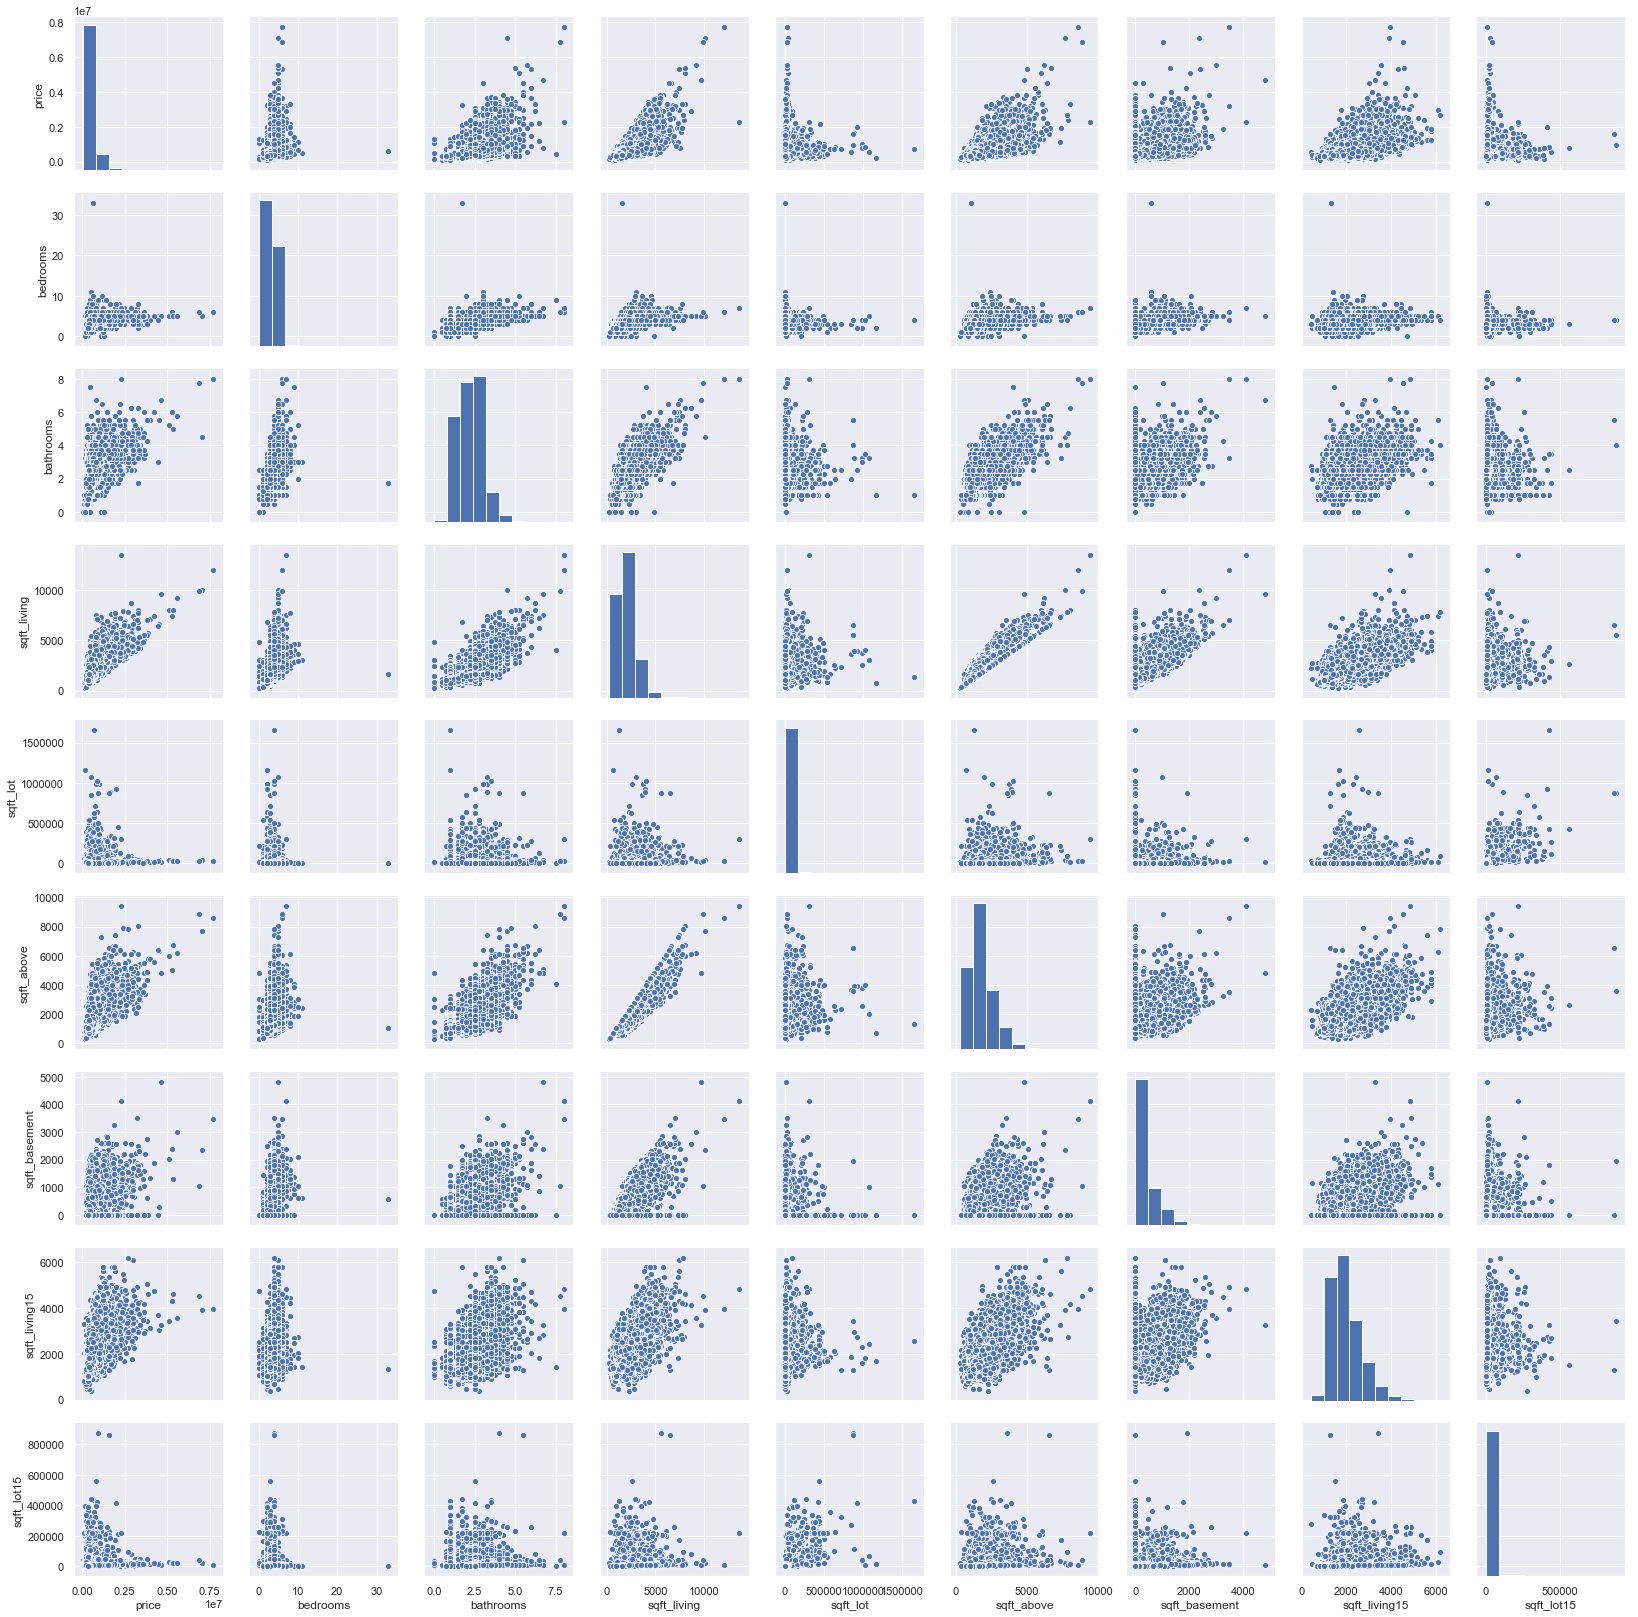

In [245]:
sns.pairplot(houses[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot',
                     'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']])

# Preparacion datos

## Eliminacion de columnas

In [5]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
houses.drop(['id','date'],axis=1,inplace=True)

In [7]:
houses.shape

(21613, 19)

In [249]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Estadisticas

In [250]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Skew & kurtosis

In [251]:
houses.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [252]:
houses.kurtosis()

price             34.585540
bedrooms          49.063653
bathrooms          1.279902
sqft_living        5.243093
sqft_lot         285.077820
floors            -0.484723
waterfront       127.632494
view              10.893022
condition          0.525764
grade              1.190932
sqft_above         3.402304
sqft_basement      2.715574
yr_built          -0.657408
yr_renovated      18.701152
zipcode           -0.853479
lat               -0.676313
long               1.049501
sqft_living15      1.597096
sqft_lot15       150.763110
dtype: float64

## ANOVA

In [253]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [254]:
# best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif,k='all')
fvalue_selector.fit_transform(houses.drop(['price'],axis=1), houses.price);
scores=fvalue_selector.scores_

In [255]:
anova = pd.DataFrame({'columnas': houses.drop(['price'],axis=1).columns.tolist(),'scores': scores.tolist()})

In [256]:
anova.sort_values('scores',ascending=False)

,columnas,scores
2,sqft_living,7.347198
8,grade,6.926336
16,sqft_living15,5.176749
9,sqft_above,5.025809
1,bathrooms,3.558845
14,lat,3.191478
5,waterfront,2.694191
6,view,2.439409
10,sqft_basement,1.901768
0,bedrooms,1.679357


## Correlación

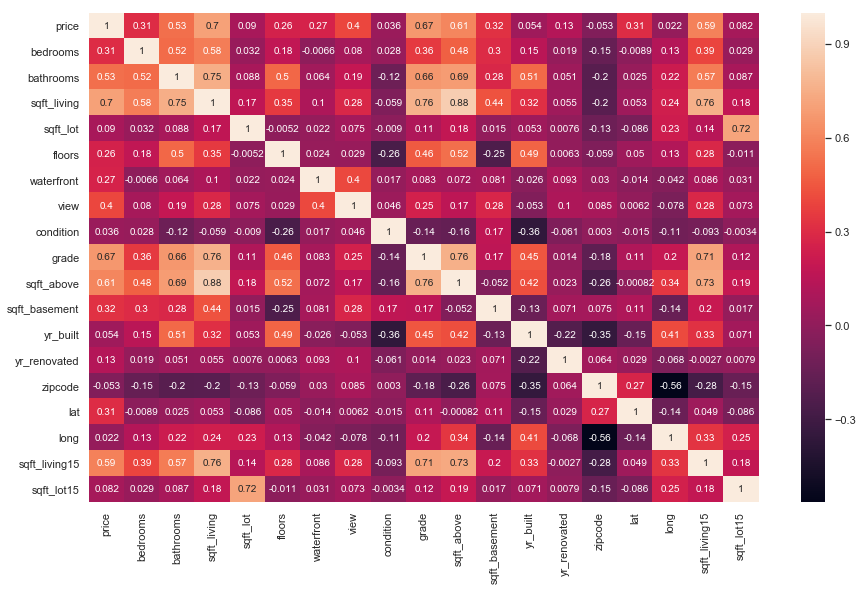

In [257]:
plt.figure(figsize=[15,9])
sns.heatmap(houses.corr(),annot=True);

# OUTLIERS

Los valores atípicos son valores extremos que se desvían de otras observaciones en los datos, pueden indicar una variabilidad en una medición, errores experimentales o una novedad. En otras palabras, un valor atípico es una observación que se aparta de un patrón general en una muestra.

Muchos modelos de aprendizaje automático, como la regresión lineal y logística, se ven fácilmente afectados por los valores atípicos en los datos de entrenamiento. Para superar este problema, podemos cambiar el modelo o la métrica, o podemos hacer algunos cambios en los datos y usar los mismos modelos.

No existe una receta como tal, implica mucho el conocimiento del problema y los datos para saber cuáles son errores que se podrían eliminar o cuales son atípicos que deseo dejar ya que es posible que se presenten nuevamente.

Sin embargo, se puede utilizar el test de Tukey que por su sencillez y resultados es un buen punto de partida, el cual toma como referencia la diferencia entre el primer cuartil Q_1 y el tercer cuartil Q_3, o rango intercuartílico. En un diagrama de caja se considera un valor atípico el que se encuentra 1,5 veces esa distancia de uno de esos cuartiles (atípico leve) o a 3 veces esa distancia (atípico extremo).

Gráficamente se identificaron varios valores por fuera de los normal, eliminémoslos

In [8]:
# Funcion para eliminar outliers a partir del rango interquartile
def drop_outliers(df, field_name):
    IQR = (df[field_name].quantile(.75) - df[field_name].quantile(.25))
    K=1.5#K=3
    df.drop(df[df[field_name] > df[field_name].quantile(.75)+(IQR*K)].index, inplace=True)
    df.drop(df[df[field_name] < df[field_name].quantile(.25)-(IQR*K)].index, inplace=True)

In [10]:
# columnas con atipicos
list_columns_outlier = ['bedrooms','sqft_basement','sqft_lot15']

for col in list_columns_outlier:
    drop_outliers(houses,col)

In [11]:
houses.shape

(18548, 19)

# Machine Learning

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Split 

In [13]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
X = houses[['sqft_living']]
y = houses['price']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## LinearRegression

In [17]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Resultados

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
y_pred=linear_regressor.predict(X_test)

In [20]:
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2  :'  ,r2_score(y_test,y_pred))

MAE : 154947.17826610687
MSE : 47979871147.92551
RMSE: 219043.08057531857
R2  : 0.4329293175075343


In [21]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

In [22]:
X = houses[my_features]
y = houses['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear_regressor.fit(X_train, y_train);
y_pred=linear_regressor.predict(X_test)

In [23]:
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2  :'  ,r2_score(y_test,y_pred))

MAE : 151711.0382149471
MSE : 46631259776.297066
RMSE: 215942.72336964047
R2  : 0.4488684593315845


In [24]:
linear_regressor.intercept_

130365.38913564879

In [25]:
linear_regressor.coef_

array([-5.96098463e+04, -1.48074506e+03,  2.85922127e+02, -7.59797403e-01,
        1.55162724e+04])

### Cross Validation

In [26]:
from sklearn.model_selection import KFold, cross_val_score

In [27]:
X = houses[my_features]
y = houses['price']

In [28]:
cv_results =cross_val_score(linear_regressor,X,y,cv=10,scoring='r2',n_jobs=-1)
cv_results.mean()

0.44183506198875594

In [29]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','grade',
               'sqft_above','sqft_basement']
X = houses[my_features]
y = houses['price']
cv_results =cross_val_score(linear_regressor,X,y,cv=10,scoring='r2',n_jobs=-1)
cv_results.mean()

0.5067883133846547

In [30]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','grade',
               'sqft_above','sqft_basement','waterfront', 'view']
X = houses[my_features]
y = houses['price']
cv_results =cross_val_score(linear_regressor,X,y,cv=10,scoring='r2',n_jobs=-1)
cv_results.mean()

0.5409724119157854

In [31]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','grade',
               'sqft_above','sqft_basement','waterfront', 'view', 'condition', 'sqft_living15', 'sqft_lot15']
X = houses[my_features]
y = houses['price']
cv_results =cross_val_score(linear_regressor,X,y,cv=10,scoring='r2',n_jobs=-1)
cv_results.mean()

0.5614774899626676

### PREDICTIONS

In [32]:
X = houses[my_features]
y = houses['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear_regressor.fit(X_train, y_train);

Como podemos predecir el precio de una casa ? 

In [362]:
new_house = pd.DataFrame({'bedrooms':3,
                          'bathrooms':3,
                          'sqft_living':1190,
                          'sqft_lot':2000,
                          'floors':2,
                          'grade':4,
                          'sqft_above':1190,
                          'sqft_basement':10,
                          'waterfront':1,
                          'view':1,
                          'condition':3,
                          'sqft_living15':1200,
                          'sqft_lot15':2000},index=[0])
new_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,waterfront,view,condition,sqft_living15,sqft_lot15
0,3,3,1190,2000,2,4,1190,10,1,1,3,1200,2000


In [363]:
prediction=linear_regressor.predict(new_house)

print('El precio de la casa es $ {:.2f} USD '.format(prediction[0]))

El precio de la casa es $ 577453.03 USD 


## MLP-Regressor

In [364]:
# Create MLPRegressor object
mlp_regressor = MLPRegressor()

In [366]:
mlp_regressor.fit(X_train,y_train)
y_pred=mlp_regressor.predict(X_test)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2  :'  ,r2_score(y_test,y_pred))

MAE : 172202.99394202468
MSE : 72415103201.57664
RMSE: 269100.5447812706
R2  : 0.4983941056075777


### GridSearch

In [371]:
mlp_params = {'hidden_layer_sizes': [50,100,150],
             'activation' : ['logistic','tanh','relu']}

In [372]:
mlp_GS = GridSearchCV(mlp_regressor, mlp_params,scoring = 'r2',cv=3,n_jobs=-1)

In [400]:
best_mlp_regressor=mlp_GS.fit(X_train,y_train)

In [401]:
best_mlp_regressor.best_estimator_

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('MLPRegressor', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=150, learning_rate='constant',
      ...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

In [402]:
best_mlp_regressor.best_params_

{'MLPRegressor__activation': 'relu', 'MLPRegressor__hidden_layer_sizes': 150}

In [376]:
best_mlp_regressor.best_score_

0.5043155793107457

In [403]:
y_pred=best_mlp_regressor.predict(X_test)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2  :'  ,r2_score(y_test,y_pred))

MAE : 429927.6522891829
MSE : 279027589487.6558
RMSE: 528230.6214975197
R2  : -0.9327719964095829


## Pipelines

In [377]:
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [379]:
from sklearn.pipeline import Pipeline as make_pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## MLP-Regressor

In [393]:
mlp_params = {'MLPRegressor__hidden_layer_sizes': [50,100,150],
             'MLPRegressor__activation' : ['logistic','tanh','relu']}

mlp_pipe =  make_pipeline([('StandardScaler', StandardScaler()),
                           #('MinMaxScaler', MinMaxScaler())
                           ('MLPRegressor', MLPRegressor())])

mlp_GS = GridSearchCV(mlp_pipe, mlp_params,scoring = 'r2',cv=3,n_jobs=-1)

In [413]:
best_mlp_regressor=mlp_GS.fit(X_train,y_train)

In [414]:
best_mlp_regressor.best_params_

{'MLPRegressor__activation': 'relu', 'MLPRegressor__hidden_layer_sizes': 150}

In [415]:
best_mlp_regressor.best_score_

-1.5944074386218203

In [416]:
y_pred=best_mlp_regressor.predict(X_test)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2  :'  ,r2_score(y_test,y_pred))

MAE : 422235.71119337564
MSE : 269238025982.92657
RMSE: 518881.51439700235
R2  : -0.8649615184788655


## RandomForestRegressor

In [409]:
RFC_param = {'RandomForestRegressor__n_estimators': [10,50,100,150,200],
             'RandomForestRegressor__max_depth' : list(range(4,16))
            }

RFC_pipe =  make_pipeline([('MinMaxScaler', MinMaxScaler()),
                           ('RandomForestRegressor', RandomForestRegressor())])

RFC_GS = GridSearchCV(RFC_pipe, RFC_param,scoring = 'r2',cv=3,n_jobs=-1)

In [410]:
best_RFC_model=RFC_GS.fit(X,y)

In [411]:
best_RFC_model.best_score_

0.7117486154529031

In [412]:
RFC_param = {'RandomForestRegressor__n_estimators': [10,50,100,150,200],
             'RandomForestRegressor__max_depth' : list(range(4,16))
            }
RFC_pipe =  make_pipeline([('StandardScaler', StandardScaler()),
                           ('RandomForestRegressor', RandomForestRegressor())])

RFC_GS = GridSearchCV(RFC_pipe, RFC_param,scoring = 'r2',cv=3,n_jobs=-1)
best_RFC_model=RFC_GS.fit(X,y)

In [417]:
best_RFC_model.best_score_

0.711637623436667

In [418]:
best_RFC_model=RFC_GS.fit(X_train,y_train)
y_pred=best_RFC_model.predict(X_test)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2  :'  ,r2_score(y_test,y_pred))

MAE : 128378.10211021206
MSE : 44181781137.12074
RMSE: 210194.6268036382
R2  : 0.6939610542092939


# PICKLE

In [231]:
# save the model to disk
import pickle

In [232]:
filename = 'best_RFC_model.sav'
pickle.dump(RFC_GS, open(filename, 'wb'))

# Referencias
Este Notebook ha sido creado en base al trabajo realizado por varias participantes del reto de Kaggle *House Prices: Advanced Regression Techniques* y otras fuentes.

* [House Price : Some of Regression Models.](https://www.kaggle.com/fatmakursun/house-price-some-of-regression-models)
* [Stacked Regression](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)